In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

Early in my exploration of datasets available through iNaturalist, I first began by exploring single users with a large number of datapoints. "gregtasney" was among the top contributors by observation to iNaturalist, with a little under 100,000 total observations. I had tried requesting users with closer to 200,000 observations but those requested failed multiple times. I assumed this was due to data size so I scaled down to around 100,000 observations, which is where Greg came in. This dataset was the first I'd downloaded and done preliminary exploration on. 

At the bottom of this notebook, I took notes on what kinds of cleaning would be needed for columns of data. It is my opinion that __anything of worth discovered in this notebook has made its way into other notebooks and that this notebook is not worth much in review__. Consider this "doodling". However, I leave it here as documentation of the process and out of an understanding that my opinion could be wrong.

In [2]:
data_gs = pd.read_csv("../../data/observations-gregtasney.csv")
data_gs.head()

C:\Users\lisa_\AppData\Local\Temp\ipykernel_61824\3933927287.py:1: DtypeWarning: Columns (15,26,29,30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  data_gs = pd.read_csv("../../data/observations-gregtasney.csv")


,id,observed_on_string,observed_on,time_observed_at,time_zone,user_id,user_login,user_name,created_at,updated_at,...,place_county_name,place_state_name,place_country_name,place_admin1_name,place_admin2_name,species_guess,scientific_name,common_name,iconic_taxon_name,taxon_id
0,26102174,Sun May 26 2019 07:56:38 GMT+1000 (GMT+10),2019-05-26,2019-05-25 21:56:38 UTC,Brisbane,1809954,gregtasney,Greg Tasney,2019-05-31 06:25:48 UTC,2019-06-02 04:59:50 UTC,...,Salisbury,Queensland,Australia,Queensland,Salisbury,Argina astrea,Argina astrea,crotalaria pod borer,Insecta,318525.0
1,26102183,Sun May 19 2019 10:45:52 GMT+1000 (GMT+10),2019-05-19,2019-05-19 00:45:52 UTC,Brisbane,1809954,gregtasney,Greg Tasney,2019-05-31 06:26:15 UTC,2022-10-18 09:01:06 UTC,...,Corinda,Queensland,Australia,Queensland,Corinda,Lesser Wanderer,Danaus petilia,Lesser Wanderer,Insecta,333775.0
2,26102189,Sun May 19 2019 10:37:34 GMT+1000 (GMT+10),2019-05-19,2019-05-19 00:37:34 UTC,Brisbane,1809954,gregtasney,Greg Tasney,2019-05-31 06:26:36 UTC,2022-01-25 09:25:37 UTC,...,Corinda,Queensland,Australia,Queensland,Corinda,Blue Wanderer,Tirumala hamata,Blue Wanderer,Insecta,197078.0
3,26102706,NaN,NaN,NaN,Hawaii,1809954,gregtasney,Greg Tasney,2019-05-31 06:55:01 UTC,2023-04-27 13:22:35 UTC,...,Corinda,Queensland,Australia,Queensland,Corinda,Burnie Vine,Malaisia scandens,Burnie Vine,Plantae,705655.0
4,26102759,2019/05/01 8:04 PM HST,2019-05-01,2019-05-02 06:04:00 UTC,Hawaii,1809954,gregtasney,Greg Tasney,2019-05-31 06:57:25 UTC,2019-06-02 04:59:40 UTC,...,Salisbury,Queensland,Australia,Queensland,Salisbury,Argina astrea,Argina astrea,crotalaria pod borer,Insecta,318525.0


In [3]:
data_gs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97617 entries, 0 to 97616
Data columns (total 42 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                97617 non-null  int64  
 1   observed_on_string                97614 non-null  object 
 2   observed_on                       97614 non-null  object 
 3   time_observed_at                  97594 non-null  object 
 4   time_zone                         97617 non-null  object 
 5   user_id                           97617 non-null  int64  
 6   user_login                        97617 non-null  object 
 7   user_name                         97617 non-null  object 
 8   created_at                        97617 non-null  object 
 9   updated_at                        97617 non-null  object 
 10  quality_grade                     97617 non-null  object 
 11  license                           97617 non-null  object 
 12  url 

In [4]:
# looking at tail and some of the intermediate columns
data_gs.iloc[-6:-1, 9:23]

,updated_at,quality_grade,license,url,image_url,sound_url,tag_list,description,num_identification_agreements,num_identification_disagreements,captive_cultivated,oauth_application_id,place_guess,latitude
97611,2023-12-03 11:56:25 UTC,research,CC-BY-SA,https://www.inaturalist.org/observations/19285...,NaN,https://static.inaturalist.org/sounds/854912.m...,NaN,NaN,1,0,False,2.0,"Barney View QLD 4287, Australia",-28.272760
97612,2023-12-04 03:02:00 UTC,research,CC-BY-SA,https://www.inaturalist.org/observations/19285...,NaN,https://static.inaturalist.org/sounds/854918.m...,NaN,NaN,2,0,False,2.0,"Barney View QLD 4287, Australia",-28.272459
97613,2023-12-04 08:24:19 UTC,research,CC-BY-SA,https://www.inaturalist.org/observations/19285...,NaN,https://static.inaturalist.org/sounds/854919.m...,NaN,NaN,2,0,False,2.0,"Barney View QLD 4287, Australia",-28.272466
97614,2023-12-04 05:07:50 UTC,needs_id,CC-BY-SA,https://www.inaturalist.org/observations/19285...,https://inaturalist-open-data.s3.amazonaws.com...,NaN,NaN,NaN,0,0,False,2.0,"Barney View QLD 4287, Australia",-28.272574
97615,2023-12-04 08:25:27 UTC,research,CC-BY-SA,https://www.inaturalist.org/observations/19285...,NaN,https://static.inaturalist.org/sounds/854922.m...,NaN,NaN,2,0,False,2.0,"Barney View QLD 4287, Australia",-28.272747


In [5]:
# suspect user_id is same for all entries, using value_counts to confirm
data_gs["user_id"].value_counts()

1809954    97617
Name: user_id, dtype: int64

In [6]:
# suspect user_login is same for all entries, using value_counts to confirm
data_gs["user_login"].value_counts()

gregtasney    97617
Name: user_login, dtype: int64

In [7]:
# suspect user_name is same for all entries, using value_counts to confirm
data_gs["user_name"].value_counts()

Greg Tasney    97617
Name: user_name, dtype: int64

In [8]:
# suspect license is all the same, confirmed
data_gs["license"].value_counts()

CC-BY-SA    97617
Name: license, dtype: int64

In [9]:
# suspect license is all the same, confirmed
data_gs["oauth_application_id"].value_counts()

3.0    12091
2.0       81
Name: oauth_application_id, dtype: int64

In [10]:
# list of columns with null values
col_with_null = []
for col in data_gs.columns:
    if data_gs[col].describe()[0] != data_gs.shape[0]:
        col_with_null.append(col)
print(f'No. of columns with null values = {len(col_with_null)}')
col_with_null

No. of columns with null values = 28


['observed_on_string',
 'observed_on',
 'time_observed_at',
 'image_url',
 'sound_url',
 'tag_list',
 'description',
 'oauth_application_id',
 'place_guess',
 'latitude',
 'longitude',
 'positional_accuracy',
 'public_positional_accuracy',
 'geoprivacy',
 'taxon_geoprivacy',
 'positioning_method',
 'positioning_device',
 'place_town_name',
 'place_county_name',
 'place_state_name',
 'place_country_name',
 'place_admin1_name',
 'place_admin2_name',
 'species_guess',
 'scientific_name',
 'common_name',
 'iconic_taxon_name',
 'taxon_id']

In [11]:
# The columns that contribute to only 5% or fewer of the entries
for col in col_with_null:
    rows_notnull = data_gs[data_gs[col].notnull()].shape[0]
    if rows_notnull <= (data_gs.shape[0] / 20):
        print(col, ":", f'   no. of rows not null = {rows_notnull}\n')

sound_url :    no. of rows not null = 144

tag_list :    no. of rows not null = 19

description :    no. of rows not null = 4843

geoprivacy :    no. of rows not null = 462

positioning_method :    no. of rows not null = 73

positioning_device :    no. of rows not null = 73

place_town_name :    no. of rows not null = 421



In [12]:
# The columns that have fewer than 1% with null values
for col in col_with_null:
    rows_null = data_gs[data_gs[col].isnull()].shape[0]
    if rows_null <= (data_gs.shape[0] / 100):
        print(col, ":", f'   no. of null rows= {rows_null}\n')

observed_on_string :    no. of null rows= 3

observed_on :    no. of null rows= 3

time_observed_at :    no. of null rows= 23

image_url :    no. of null rows= 116

place_guess :    no. of null rows= 306

latitude :    no. of null rows= 306

longitude :    no. of null rows= 306

place_county_name :    no. of null rows= 321

place_state_name :    no. of null rows= 306

place_country_name :    no. of null rows= 306

place_admin1_name :    no. of null rows= 306

place_admin2_name :    no. of null rows= 321

scientific_name :    no. of null rows= 1

iconic_taxon_name :    no. of null rows= 2

taxon_id :    no. of null rows= 1



In [13]:
# cursory view of tag_list
data_gs[data_gs['tag_list'].notnull()].iloc[:, :17]

,id,observed_on_string,observed_on,time_observed_at,time_zone,user_id,user_login,user_name,created_at,updated_at,quality_grade,license,url,image_url,sound_url,tag_list,description
7381,45669589,2013/01/11 5:28 PM AEDT,2013-01-11,2013-01-11 06:28:00 UTC,Sydney,1809954,gregtasney,Greg Tasney,2020-05-12 10:52:29 UTC,2020-05-12 12:37:07 UTC,research,CC-BY-SA,https://www.inaturalist.org/observations/45669589,https://inaturalist-open-data.s3.amazonaws.com...,NaN,Mt Glorious 12012013,NaN
7382,45669590,2013/01/11 6:23 PM AEDT,2013-01-11,2013-01-11 07:23:00 UTC,Sydney,1809954,gregtasney,Greg Tasney,2020-05-12 10:52:30 UTC,2020-06-16 05:34:37 UTC,research,CC-BY-SA,https://www.inaturalist.org/observations/45669590,https://inaturalist-open-data.s3.amazonaws.com...,NaN,Mt Glorious 12012013,NaN
7383,45669592,2013/01/11 7:24 PM AEDT,2013-01-11,2013-01-11 08:24:00 UTC,Sydney,1809954,gregtasney,Greg Tasney,2020-05-12 10:52:31 UTC,2020-05-12 12:36:55 UTC,research,CC-BY-SA,https://www.inaturalist.org/observations/45669592,https://inaturalist-open-data.s3.amazonaws.com...,NaN,Mt Glorious 12012013,NaN
7384,45669594,2013/01/31 6:45 PM AEDT,2013-01-31,2013-01-31 07:45:00 UTC,Sydney,1809954,gregtasney,Greg Tasney,2020-05-12 10:52:32 UTC,2022-06-28 06:50:26 UTC,research,CC-BY-SA,https://www.inaturalist.org/observations/45669594,https://inaturalist-open-data.s3.amazonaws.com...,NaN,Tasmania,NaN
7385,45669595,2013/02/02 7:36 PM AEDT,2013-02-02,2013-02-02 08:36:00 UTC,Sydney,1809954,gregtasney,Greg Tasney,2020-05-12 10:52:33 UTC,2020-06-16 05:35:42 UTC,research,CC-BY-SA,https://www.inaturalist.org/observations/45669595,https://inaturalist-open-data.s3.amazonaws.com...,NaN,Tasmania,NaN
7386,45669596,2013/02/04 6:24 PM AEDT,2013-02-04,2013-02-04 07:24:00 UTC,Sydney,1809954,gregtasney,Greg Tasney,2020-05-12 10:52:35 UTC,2020-05-12 22:36:25 UTC,research,CC-BY-SA,https://www.inaturalist.org/observations/45669596,https://inaturalist-open-data.s3.amazonaws.com...,NaN,Tasmania,NaN
70422,145417256,2022/12/30 1:09 PM,2022-12-30,2022-12-30 03:09:00 UTC,Brisbane,1809954,gregtasney,Greg Tasney,2022-12-30 11:01:22 UTC,2022-12-30 20:28:09 UTC,research,CC-BY-SA,https://www.inaturalist.org/observations/14541...,https://inaturalist-open-data.s3.amazonaws.com...,NaN,Unknown,NaN
72536,146675416,2023/01/15 10:43 AM,2023-01-15,2023-01-15 00:43:00 UTC,Brisbane,1809954,gregtasney,Greg Tasney,2023-01-16 07:50:42 UTC,2023-07-22 23:07:14 UTC,needs_id,CC-BY-SA,https://www.inaturalist.org/observations/14667...,https://inaturalist-open-data.s3.amazonaws.com...,NaN,(Splityard Creek L.Pedley 5360),(Splityard Creek L.Pedley 5360)
76741,149717679,2023/02/25 7:46 AM,2023-02-25,2023-02-24 20:46:00 UTC,Sydney,1809954,gregtasney,Greg Tasney,2023-02-26 11:47:01 UTC,2023-02-26 12:23:36 UTC,research,CC-BY-SA,https://www.inaturalist.org/observations/14971...,https://inaturalist-open-data.s3.amazonaws.com...,NaN,galls,On Acacia terminalis.
76820,149719214,2023/02/25 8:21 AM,2023-02-25,2023-02-24 21:21:00 UTC,Sydney,1809954,gregtasney,Greg Tasney,2023-02-26 12:18:06 UTC,2023-05-12 13:16:21 UTC,research,CC-BY-SA,https://www.inaturalist.org/observations/14971...,https://inaturalist-open-data.s3.amazonaws.com...,NaN,Gall,NaN


In [14]:
# checking type of data for col 15
data_gs["tag_list"].map(type).value_counts()

<class 'float'>    97598
<class 'str'>         19
Name: tag_list, dtype: int64

In [15]:
# cursory view of tag_list nulls (categorized as floats)
data_gs[data_gs['tag_list'].isnull()].iloc[:, :17]

,id,observed_on_string,observed_on,time_observed_at,time_zone,user_id,user_login,user_name,created_at,updated_at,quality_grade,license,url,image_url,sound_url,tag_list,description
0,26102174,Sun May 26 2019 07:56:38 GMT+1000 (GMT+10),2019-05-26,2019-05-25 21:56:38 UTC,Brisbane,1809954,gregtasney,Greg Tasney,2019-05-31 06:25:48 UTC,2019-06-02 04:59:50 UTC,research,CC-BY-SA,https://www.inaturalist.org/observations/26102174,https://inaturalist-open-data.s3.amazonaws.com...,NaN,NaN,NaN
1,26102183,Sun May 19 2019 10:45:52 GMT+1000 (GMT+10),2019-05-19,2019-05-19 00:45:52 UTC,Brisbane,1809954,gregtasney,Greg Tasney,2019-05-31 06:26:15 UTC,2022-10-18 09:01:06 UTC,research,CC-BY-SA,https://www.inaturalist.org/observations/26102183,https://inaturalist-open-data.s3.amazonaws.com...,NaN,NaN,NaN
2,26102189,Sun May 19 2019 10:37:34 GMT+1000 (GMT+10),2019-05-19,2019-05-19 00:37:34 UTC,Brisbane,1809954,gregtasney,Greg Tasney,2019-05-31 06:26:36 UTC,2022-01-25 09:25:37 UTC,research,CC-BY-SA,https://www.inaturalist.org/observations/26102189,https://inaturalist-open-data.s3.amazonaws.com...,NaN,NaN,NaN
3,26102706,NaN,NaN,NaN,Hawaii,1809954,gregtasney,Greg Tasney,2019-05-31 06:55:01 UTC,2023-04-27 13:22:35 UTC,casual,CC-BY-SA,https://www.inaturalist.org/observations/26102706,https://inaturalist-open-data.s3.amazonaws.com...,NaN,NaN,NaN
4,26102759,2019/05/01 8:04 PM HST,2019-05-01,2019-05-02 06:04:00 UTC,Hawaii,1809954,gregtasney,Greg Tasney,2019-05-31 06:57:25 UTC,2019-06-02 04:59:40 UTC,research,CC-BY-SA,https://www.inaturalist.org/observations/26102759,https://inaturalist-open-data.s3.amazonaws.com...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97612,192852297,2023-11-30 06:22:00,2023-11-30,2023-11-29 20:22:00 UTC,Brisbane,1809954,gregtasney,Greg Tasney,2023-12-02 20:37:08 UTC,2023-12-04 03:02:00 UTC,research,CC-BY-SA,https://www.inaturalist.org/observations/19285...,NaN,https://static.inaturalist.org/sounds/854918.m...,NaN,NaN
97613,192852406,2023-11-30 20:32:00,2023-11-30,2023-11-30 10:32:00 UTC,Brisbane,1809954,gregtasney,Greg Tasney,2023-12-02 20:38:32 UTC,2023-12-04 08:24:19 UTC,research,CC-BY-SA,https://www.inaturalist.org/observations/19285...,NaN,https://static.inaturalist.org/sounds/854919.m...,NaN,NaN
97614,192852560,2023-11-29 19:11:00,2023-11-29,2023-11-29 09:11:00 UTC,Brisbane,1809954,gregtasney,Greg Tasney,2023-12-02 20:40:21 UTC,2023-12-04 05:07:50 UTC,needs_id,CC-BY-SA,https://www.inaturalist.org/observations/19285...,https://inaturalist-open-data.s3.amazonaws.com...,NaN,NaN,NaN
97615,192852761,2023-11-29 00:42:00,2023-11-29,2023-11-28 14:42:00 UTC,Brisbane,1809954,gregtasney,Greg Tasney,2023-12-02 20:42:57 UTC,2023-12-04 08:25:27 UTC,research,CC-BY-SA,https://www.inaturalist.org/observations/19285...,NaN,https://static.inaturalist.org/sounds/854922.m...,NaN,NaN


In [16]:
# cursory view of descriptions 
data_gs[data_gs['description'].notnull()]['description']

17                                    Planted early 2000's
104                                            On Myoporum
113                Escaped or dumped pet. Pet trade morph.
171      No records on iNaturlist. It's a common plant ...
265      I prefer Oplismenus aemulus which iNaturlist h...
                               ...                        
97484                                  On Smilax australis
97487        Pandorea sp. (Mt Maroon P.I.Forster+ PIF7111)
97517                          N.punctata or N.longifolia.
97545                                   A strange outlier.
97562    Terrible pics. Just couldn't get the short len...
Name: description, Length: 4843, dtype: object

In [17]:
# percent of entries with data from description column
data_gs[data_gs['description'].notnull()].shape[0] / data_gs.shape[0]

0.04961226015960335

In [18]:
# cursory view of latitude nulls
data_gs[data_gs['latitude'].isnull()].iloc[:, 21:37]

,place_guess,latitude,longitude,positional_accuracy,public_positional_accuracy,geoprivacy,taxon_geoprivacy,coordinates_obscured,positioning_method,positioning_device,place_town_name,place_county_name,place_state_name,place_country_name,place_admin1_name,place_admin2_name
6789,NaN,NaN,NaN,10.0,29727.0,private,obscured,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11292,NaN,NaN,NaN,NaN,29680.0,private,obscured,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11373,NaN,NaN,NaN,1118.0,29680.0,private,obscured,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11380,NaN,NaN,NaN,65.0,29680.0,private,obscured,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11389,NaN,NaN,NaN,1055.0,29680.0,private,obscured,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88333,NaN,NaN,NaN,NaN,29680.0,private,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88334,NaN,NaN,NaN,NaN,29680.0,private,open,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88335,NaN,NaN,NaN,NaN,29680.0,private,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88336,NaN,NaN,NaN,NaN,29680.0,private,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
#Geoprivacy can be converted to dummies IF removal of missing lat and lon leaves anything other than NaN
data_gs["geoprivacy"].value_counts()

private     305
obscured    157
Name: geoprivacy, dtype: int64

In [20]:
#taxon_geoprivacy can be converted to dummies IF removal of missing lat and lon leaves anything other than open
data_gs["taxon_geoprivacy"].value_counts()

open        31363
obscured     1652
Name: taxon_geoprivacy, dtype: int64

In [21]:
# cursory view of latitude not nulls
data_gs[data_gs['latitude'].notnull()].iloc[:, 21:37]

,place_guess,latitude,longitude,positional_accuracy,public_positional_accuracy,geoprivacy,taxon_geoprivacy,coordinates_obscured,positioning_method,positioning_device,place_town_name,place_county_name,place_state_name,place_country_name,place_admin1_name,place_admin2_name
0,"Russ Hall Park, Salisbury, QLD, AU",-27.550703,153.034180,5.0,5.0,NaN,NaN,False,NaN,NaN,NaN,Salisbury,Queensland,Australia,Queensland,Salisbury
1,"87 Archer Parade, Corinda, QLD, AU",-27.548263,152.994475,5.0,5.0,NaN,NaN,False,NaN,NaN,NaN,Corinda,Queensland,Australia,Queensland,Corinda
2,"430 Cliveden Avenue, Corinda, QLD, AU",-27.550458,152.993713,5.0,5.0,NaN,NaN,False,NaN,NaN,NaN,Corinda,Queensland,Australia,Queensland,Corinda
3,"Brisbane QLD, Australia",-27.550470,152.994234,15.0,15.0,NaN,NaN,False,NaN,NaN,NaN,Corinda,Queensland,Australia,Queensland,Corinda
4,"Brisbane QLD, Australia",-27.550649,153.034376,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,Salisbury,Queensland,Australia,Queensland,Salisbury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97612,"Barney View QLD 4287, Australia",-28.272459,152.769096,77.0,77.0,NaN,open,False,gps,gps,NaN,Beaudesert - Pt C,Queensland,Australia,Queensland,Beaudesert - Pt C
97613,"Barney View QLD 4287, Australia",-28.272466,152.769034,80.0,80.0,NaN,open,False,gps,gps,NaN,Beaudesert - Pt C,Queensland,Australia,Queensland,Beaudesert - Pt C
97614,"Barney View QLD 4287, Australia",-28.272574,152.769949,35.0,35.0,NaN,NaN,False,gps,gps,NaN,Beaudesert - Pt C,Queensland,Australia,Queensland,Beaudesert - Pt C
97615,"Barney View QLD 4287, Australia",-28.272747,152.769823,49.0,49.0,NaN,open,False,NaN,NaN,NaN,Beaudesert - Pt C,Queensland,Australia,Queensland,Beaudesert - Pt C


In [22]:
# table for count of entries by county
data_gs['place_county_name'].value_counts()

Salisbury                                  5493
Guanaba-Springbrook                        4845
Brookfield (incl. Brisbane Forest Park)    4756
Caloundra - Rail Corridor                  4558
Boonah                                     4142
                                           ... 
San Francisco                                 1
Dakabin-Kallangur-M. Downs                    1
Spring Hill                                   1
Jamboree Heights                              1
Launceston - Pt B                             1
Name: place_county_name, Length: 267, dtype: int64

In [23]:
# table for place_admin2_name shows it's highly likely it is duplicate info to place_county_name
data_gs['place_admin2_name'].value_counts()

Salisbury                                  5493
Guanaba-Springbrook                        4845
Brookfield (incl. Brisbane Forest Park)    4756
Caloundra - Rail Corridor                  4558
Boonah                                     4142
                                           ... 
San Francisco                                 1
Dakabin-Kallangur-M. Downs                    1
Spring Hill                                   1
Jamboree Heights                              1
Launceston - Pt B                             1
Name: place_admin2_name, Length: 267, dtype: int64

In [24]:
# table for count of entries by state
data_gs['place_state_name'].value_counts()

Queensland                      91450
New South Wales                  2986
Western Australia                2368
Australian Capital Territory      499
Tasmania                            7
California                          1
Name: place_state_name, dtype: int64

In [25]:
# table for place_admin1_name shows it's highly likely it is duplicate info to place_state_name
data_gs['place_admin1_name'].value_counts()

Queensland                      91450
New South Wales                  2986
Western Australia                2368
Australian Capital Territory      499
Tasmania                            7
California                          1
Name: place_admin1_name, dtype: int64

In [26]:
# table for count of entry by country shows all but one entry is in Australia
data_gs['place_country_name'].value_counts()

Australia        97310
United States        1
Name: place_country_name, dtype: int64

In [27]:
# explore columns 21 - 33 together for better understanding of positional accuracy nulls
data_gs[data_gs["positional_accuracy"].isnull()].iloc[:, 21:34]

,place_guess,latitude,longitude,positional_accuracy,public_positional_accuracy,geoprivacy,taxon_geoprivacy,coordinates_obscured,positioning_method,positioning_device,place_town_name,place_county_name,place_state_name
4,"Brisbane QLD, Australia",-27.550649,153.034376,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,Salisbury,Queensland
9,"Brisbane QLD, Australia",-27.549833,153.033437,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,Salisbury,Queensland
10,"Brisbane QLD, Australia",-27.549830,153.033446,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,Salisbury,Queensland
11,"Brisbane QLD, Australia",-27.549974,153.033748,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,Salisbury,Queensland
14,"Brisbane QLD, Australia",-27.550545,153.034303,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,Salisbury,Queensland
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97602,"Barney View QLD 4287, Australia",-28.271257,152.768784,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,Beaudesert - Pt C,Queensland
97603,"Barney View QLD 4287, Australia",-28.271368,152.768799,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,Beaudesert - Pt C,Queensland
97604,"Barney View QLD 4287, Australia",-28.271406,152.768814,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,Beaudesert - Pt C,Queensland
97605,"Barney View QLD 4287, Australia",-28.271349,152.768875,NaN,NaN,NaN,open,False,NaN,NaN,NaN,Beaudesert - Pt C,Queensland


In [28]:
# explore columns 21 - 33 together for better understanding of positional accuracy when present
data_gs[data_gs["positional_accuracy"].notnull()].iloc[:, 21:34]

,place_guess,latitude,longitude,positional_accuracy,public_positional_accuracy,geoprivacy,taxon_geoprivacy,coordinates_obscured,positioning_method,positioning_device,place_town_name,place_county_name,place_state_name
0,"Russ Hall Park, Salisbury, QLD, AU",-27.550703,153.034180,5.0,5.0,NaN,NaN,False,NaN,NaN,NaN,Salisbury,Queensland
1,"87 Archer Parade, Corinda, QLD, AU",-27.548263,152.994475,5.0,5.0,NaN,NaN,False,NaN,NaN,NaN,Corinda,Queensland
2,"430 Cliveden Avenue, Corinda, QLD, AU",-27.550458,152.993713,5.0,5.0,NaN,NaN,False,NaN,NaN,NaN,Corinda,Queensland
3,"Brisbane QLD, Australia",-27.550470,152.994234,15.0,15.0,NaN,NaN,False,NaN,NaN,NaN,Corinda,Queensland
5,"Brisbane QLD, Australia",-27.550324,153.033956,4.0,4.0,NaN,NaN,False,NaN,NaN,NaN,Salisbury,Queensland
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97612,"Barney View QLD 4287, Australia",-28.272459,152.769096,77.0,77.0,NaN,open,False,gps,gps,NaN,Beaudesert - Pt C,Queensland
97613,"Barney View QLD 4287, Australia",-28.272466,152.769034,80.0,80.0,NaN,open,False,gps,gps,NaN,Beaudesert - Pt C,Queensland
97614,"Barney View QLD 4287, Australia",-28.272574,152.769949,35.0,35.0,NaN,NaN,False,gps,gps,NaN,Beaudesert - Pt C,Queensland
97615,"Barney View QLD 4287, Australia",-28.272747,152.769823,49.0,49.0,NaN,open,False,NaN,NaN,NaN,Beaudesert - Pt C,Queensland


The non null set of positional_accuracy has 36605 values


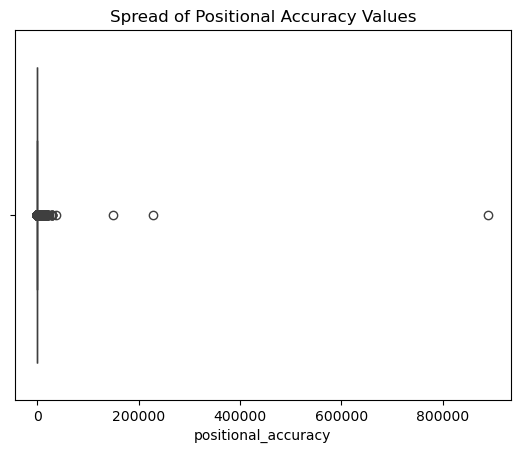

In [29]:
# boxplot of positional accuracy non null values
PA_notnull = pd.DataFrame(data_gs[data_gs["positional_accuracy"].notnull()]["positional_accuracy"])
sns.boxplot(x = "positional_accuracy", data = PA_notnull).set_title("Spread of Positional Accuracy Values")
print(f'The non null set of positional_accuracy has {PA_notnull.shape[0]} values')

The non null set of positional_accuracy with values less than 10000m has 36499 values


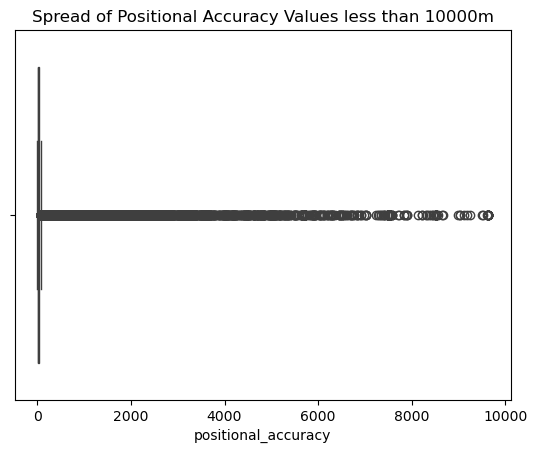

In [30]:
# again with removal of extreme outliers
Limit = 10000
sns.boxplot(x = "positional_accuracy", data = PA_notnull[PA_notnull["positional_accuracy"] < Limit]).set_title(f'Spread of Positional Accuracy Values less than {Limit}m')
print(f'The non null set of positional_accuracy with values less than {Limit}m has {PA_notnull[PA_notnull["positional_accuracy"] < Limit].shape[0]} values')

In [31]:
PA_notnull.describe()

,positional_accuracy
count,36605.000000
mean,301.556782
std,5025.390953
min,1.000000
25%,5.000000
50%,11.000000
75%,31.000000
max,890308.000000


The non null set of positional_accuracy with values less than 200m has 32503 values


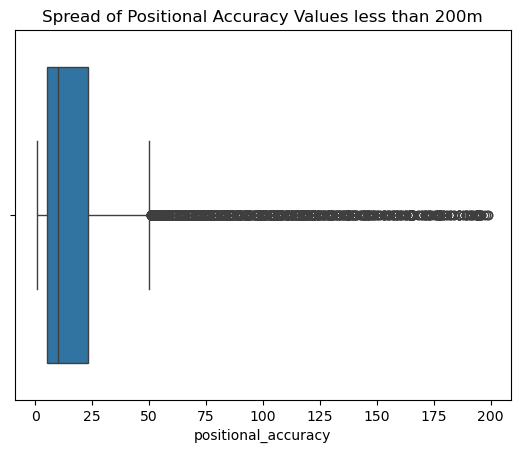

In [32]:
# again with removal of extreme outliers
Limit = 200
sns.boxplot(x = "positional_accuracy", data = PA_notnull[PA_notnull["positional_accuracy"] < Limit]).set_title(f'Spread of Positional Accuracy Values less than {Limit}m')
print(f'The non null set of positional_accuracy with values less than {Limit}m has {PA_notnull[PA_notnull["positional_accuracy"] < Limit].shape[0]} values')

In [33]:
# iNaturalist website names positional accuracy of 30 m or less necessary for some types of analysis
Limit = 30
print(f'The non null set of positional_accuracy with values less than {Limit}m has {PA_notnull[PA_notnull["positional_accuracy"] < Limit].shape[0]} values')

The non null set of positional_accuracy with values less than 30m has 25237 values


In [34]:
# cursory view of null species_guess
data_gs[data_gs["species_guess"].isnull()]

,id,observed_on_string,observed_on,time_observed_at,time_zone,user_id,user_login,user_name,created_at,updated_at,...,place_county_name,place_state_name,place_country_name,place_admin1_name,place_admin2_name,species_guess,scientific_name,common_name,iconic_taxon_name,taxon_id
8,26102900,2018/10/29 8:38 PM HST,2018-10-29,2018-10-30 06:38:00 UTC,Hawaii,1809954,gregtasney,Greg Tasney,2019-05-31 07:05:06 UTC,2019-05-31 13:24:42 UTC,...,Salisbury,Queensland,Australia,Queensland,Salisbury,NaN,Ellipsidion,NaN,Insecta,123759.0
229,26664365,Sun Jun 09 2019 12:12:17 GMT+1000 (GMT+10),2019-06-09,2019-06-09 02:12:17 UTC,Brisbane,1809954,gregtasney,Greg Tasney,2019-06-09 09:49:33 UTC,2019-06-09 09:50:36 UTC,...,Oxley,Queensland,Australia,Queensland,Oxley,NaN,Typha orientalis,Oriental Cattail,Plantae,341639.0
319,28284074,Sat Jul 06 2019 15:32:53 GMT+1000 (GMT+10),2019-07-06,2019-07-06 05:32:53 UTC,Brisbane,1809954,gregtasney,Greg Tasney,2019-07-06 11:15:35 UTC,2019-07-06 11:15:52 UTC,...,Salisbury,Queensland,Australia,Queensland,Salisbury,NaN,Cyathus,NaN,Fungi,68301.0
326,28785801,Sun Jul 14 2019 10:26:11 GMT+1000 (GMT+10),2019-07-14,2019-07-14 00:26:11 UTC,Brisbane,1809954,gregtasney,Greg Tasney,2019-07-14 09:50:27 UTC,2019-07-14 09:50:36 UTC,...,Corinda,Queensland,Australia,Queensland,Corinda,NaN,Utetheisa lotrix lotrix,Crotalaria Moth,Insecta,694983.0
337,29570965,Fri Jul 26 2019 14:47:39 GMT+1000 (GMT+10),2019-07-26,2019-07-26 04:47:39 UTC,Brisbane,1809954,gregtasney,Greg Tasney,2019-07-26 13:30:53 UTC,2019-07-26 13:31:18 UTC,...,Salisbury,Queensland,Australia,Queensland,Salisbury,NaN,Pergidae,Pergid Sawflies,Insecta,201415.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89951,180089176,2023-08-25 18:20:31+10:00,2023-08-25,2023-08-25 08:20:31 UTC,Brisbane,1809954,gregtasney,Greg Tasney,2023-08-25 08:26:52 UTC,2023-08-25 08:26:57 UTC,...,Deagon,Queensland,Australia,Queensland,Deagon,NaN,Eucyclodes,NaN,Insecta,155505.0
90095,180408673,2023-08-27 14:03:41+10:00,2023-08-27,2023-08-27 04:03:41 UTC,Brisbane,1809954,gregtasney,Greg Tasney,2023-08-27 08:58:29 UTC,2023-08-27 08:58:49 UTC,...,Salisbury,Queensland,Australia,Queensland,Salisbury,NaN,Simaetha,NaN,Arachnida,368389.0
90185,181363537,2023-09-02 18:45:10+10:00,2023-09-02,2023-09-02 08:45:10 UTC,Brisbane,1809954,gregtasney,Greg Tasney,2023-09-02 13:11:10 UTC,2023-09-02 13:11:35 UTC,...,Broadsound,Queensland,Australia,Queensland,Broadsound,NaN,Scolopendridae,Scolopendrid Centipedes,Animalia,53764.0
91250,182863875,2023-09-08 20:37:09+10:00,2023-09-08,2023-09-08 10:37:09 UTC,Brisbane,1809954,gregtasney,Greg Tasney,2023-09-11 21:27:36 UTC,2023-09-11 21:28:43 UTC,...,Boonah,Queensland,Australia,Queensland,Boonah,NaN,Acacia acrionastes,NaN,Plantae,898576.0


In [35]:
# cursory view of null iconic_taxon_name
data_gs[data_gs["iconic_taxon_name"].isnull()]

,id,observed_on_string,observed_on,time_observed_at,time_zone,user_id,user_login,user_name,created_at,updated_at,...,place_county_name,place_state_name,place_country_name,place_admin1_name,place_admin2_name,species_guess,scientific_name,common_name,iconic_taxon_name,taxon_id
39124,103797739,2021/12/26 8:29 PM AEDT,2021-12-26,2021-12-26 09:29:00 UTC,Sydney,1809954,gregtasney,Greg Tasney,2021-12-28 03:19:46 UTC,2023-09-09 06:56:40 UTC,...,Caloundra - Rail Corridor,Queensland,Australia,Queensland,Caloundra - Rail Corridor,Life,Life,Life,NaN,48460.0
91850,184797523,NaN,NaN,NaN,Sydney,1809954,gregtasney,Greg Tasney,2023-09-25 01:26:38 UTC,2023-09-25 01:26:38 UTC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# cursory view of null common name
data_gs[data_gs["common_name"].isnull()]

,id,observed_on_string,observed_on,time_observed_at,time_zone,user_id,user_login,user_name,created_at,updated_at,...,place_county_name,place_state_name,place_country_name,place_admin1_name,place_admin2_name,species_guess,scientific_name,common_name,iconic_taxon_name,taxon_id
8,26102900,2018/10/29 8:38 PM HST,2018-10-29,2018-10-30 06:38:00 UTC,Hawaii,1809954,gregtasney,Greg Tasney,2019-05-31 07:05:06 UTC,2019-05-31 13:24:42 UTC,...,Salisbury,Queensland,Australia,Queensland,Salisbury,NaN,Ellipsidion,NaN,Insecta,123759.0
12,26102952,2019/04/28 2:20 PM HST,2019-04-28,2019-04-29 00:20:00 UTC,Hawaii,1809954,gregtasney,Greg Tasney,2019-05-31 07:09:11 UTC,2022-09-01 10:23:08 UTC,...,Salisbury,Queensland,Australia,Queensland,Salisbury,Cryptocephalini,Aporocera,NaN,Insecta,375593.0
14,26102973,2019/04/04 8:34 PM HST,2019-04-04,2019-04-05 06:34:00 UTC,Hawaii,1809954,gregtasney,Greg Tasney,2019-05-31 07:10:48 UTC,2023-07-07 15:44:55 UTC,...,Salisbury,Queensland,Australia,Queensland,Salisbury,Pseudorhynchus,Pseudorhynchus lessonii,NaN,Insecta,1478488.0
21,26104403,Sat May 11 2019 14:59:53 GMT+1000 (GMT+10),2019-05-11,2019-05-11 04:59:53 UTC,Brisbane,1809954,gregtasney,Greg Tasney,2019-05-31 08:26:16 UTC,2021-02-08 02:02:23 UTC,...,Salisbury,Queensland,Australia,Queensland,Salisbury,Lilioceris bakewelli,Lilioceris bakewelli,NaN,Insecta,568055.0
31,26104888,Sun Mar 10 2019 08:18:15 GMT+1000 (GMT+10),2019-03-10,2019-03-09 22:18:15 UTC,Brisbane,1809954,gregtasney,Greg Tasney,2019-05-31 08:53:13 UTC,2019-10-02 09:12:44 UTC,...,Corinda,Queensland,Australia,Queensland,Corinda,Rostellularia obtusa,Rostellularia obtusa,NaN,Plantae,933215.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97583,192812799,2023/11/29 5:53 PM,2023-11-29,2023-11-29 07:53:00 UTC,Brisbane,1809954,gregtasney,Greg Tasney,2023-12-02 12:59:29 UTC,2023-12-02 12:59:29 UTC,...,Beaudesert - Pt C,Queensland,Australia,Queensland,Beaudesert - Pt C,Everistia vacciniifolia nervosa,Everistia vacciniifolia nervosa,NaN,Plantae,895386.0
97594,192812813,2023/11/29 6:01 PM,2023-11-29,2023-11-29 08:01:00 UTC,Brisbane,1809954,gregtasney,Greg Tasney,2023-12-02 12:59:33 UTC,2023-12-02 21:44:13 UTC,...,Beaudesert - Pt C,Queensland,Australia,Queensland,Beaudesert - Pt C,Gynochthodes canthoides,Gynochthodes canthoides,NaN,Plantae,1039656.0
97602,192812823,2023/11/29 6:10 PM,2023-11-29,2023-11-29 08:10:00 UTC,Brisbane,1809954,gregtasney,Greg Tasney,2023-12-02 12:59:35 UTC,2023-12-02 23:32:25 UTC,...,Beaudesert - Pt C,Queensland,Australia,Queensland,Beaudesert - Pt C,Dianella brevipedunculata,Dianella brevipedunculata,NaN,Plantae,543982.0
97603,192812824,2023/11/29 6:12 PM,2023-11-29,2023-11-29 08:12:00 UTC,Brisbane,1809954,gregtasney,Greg Tasney,2023-12-02 12:59:35 UTC,2023-12-02 12:59:35 UTC,...,Beaudesert - Pt C,Queensland,Australia,Queensland,Beaudesert - Pt C,Erebinae,Erebinae,NaN,Insecta,122426.0


In [37]:
# cursory view of null positioning_method
data_gs[data_gs["positioning_method"].isnull()].iloc[:,21:34]

,place_guess,latitude,longitude,positional_accuracy,public_positional_accuracy,geoprivacy,taxon_geoprivacy,coordinates_obscured,positioning_method,positioning_device,place_town_name,place_county_name,place_state_name
0,"Russ Hall Park, Salisbury, QLD, AU",-27.550703,153.034180,5.0,5.0,NaN,NaN,False,NaN,NaN,NaN,Salisbury,Queensland
1,"87 Archer Parade, Corinda, QLD, AU",-27.548263,152.994475,5.0,5.0,NaN,NaN,False,NaN,NaN,NaN,Corinda,Queensland
2,"430 Cliveden Avenue, Corinda, QLD, AU",-27.550458,152.993713,5.0,5.0,NaN,NaN,False,NaN,NaN,NaN,Corinda,Queensland
3,"Brisbane QLD, Australia",-27.550470,152.994234,15.0,15.0,NaN,NaN,False,NaN,NaN,NaN,Corinda,Queensland
4,"Brisbane QLD, Australia",-27.550649,153.034376,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,Salisbury,Queensland
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97606,"Barney View QLD 4287, Australia",-28.271364,152.768906,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,Beaudesert - Pt C,Queensland
97607,"Barney View QLD 4287, Australia",-28.271178,152.768654,4.0,4.0,NaN,open,False,NaN,NaN,NaN,Beaudesert - Pt C,Queensland
97611,"Barney View QLD 4287, Australia",-28.272760,152.770065,54.0,54.0,NaN,NaN,False,NaN,NaN,NaN,Beaudesert - Pt C,Queensland
97615,"Barney View QLD 4287, Australia",-28.272747,152.769823,49.0,49.0,NaN,open,False,NaN,NaN,NaN,Beaudesert - Pt C,Queensland


In [38]:
# cursory view of not null positioning_method
data_gs[data_gs["positioning_method"].notnull()].iloc[:,21:34]

,place_guess,latitude,longitude,positional_accuracy,public_positional_accuracy,geoprivacy,taxon_geoprivacy,coordinates_obscured,positioning_method,positioning_device,place_town_name,place_county_name,place_state_name
91584,"Salisbury QLD 4107, Australia",-27.550275,153.034318,285.0,285.0,NaN,NaN,False,gps,gps,NaN,Salisbury,Queensland
91887,"Tom O'Hara Park, Leichhardt River Road, Kalkad...",-20.684130,139.495478,189.0,189.0,NaN,NaN,False,gps,gps,NaN,Mount Isa,Queensland
92372,"Salisbury QLD 4107, Australia",-27.550093,153.033900,59.0,59.0,NaN,NaN,False,gps,gps,NaN,Salisbury,Queensland
92373,"CXCR+Q9 Lookout Archerfield Wetland, Willawong...",-27.577753,152.991075,124.0,124.0,NaN,NaN,False,gps,gps,NaN,Willawong,Queensland
92374,"McCarthy Rd at Russ Hall Park, stop 45, Salisb...",-27.549900,153.033699,75.0,75.0,NaN,NaN,False,gps,gps,NaN,Salisbury,Queensland
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97609,"Barney View QLD 4287, Australia",-28.272321,152.770096,69.0,69.0,NaN,open,False,gps,gps,NaN,Beaudesert - Pt C,Queensland
97610,"Barney View QLD 4287, Australia",-28.273661,152.770207,44.0,44.0,NaN,open,False,gps,gps,NaN,Beaudesert - Pt C,Queensland
97612,"Barney View QLD 4287, Australia",-28.272459,152.769096,77.0,77.0,NaN,open,False,gps,gps,NaN,Beaudesert - Pt C,Queensland
97613,"Barney View QLD 4287, Australia",-28.272466,152.769034,80.0,80.0,NaN,open,False,gps,gps,NaN,Beaudesert - Pt C,Queensland


In [39]:
data_gs["positioning_method"].value_counts()

gps    73
Name: positioning_method, dtype: int64

In [40]:
# both positioning_method and position_device only have 73 entries of "gps"
data_gs["positioning_device"].value_counts()

gps    73
Name: positioning_device, dtype: int64

## Notes on Cleaning:

1. id:  __leave in place__
1. observed_on_string:  __DELETE COLUMN__ (duplicate into of observed_on)
1. observed_on: __leave in place__ (only three null values which will be deleted when time_observed_at is cleaned)
1. time_observed_at: __DELETE 23 NULL ROWS__ (very key information and very small set for deletion)
1. user_id: __DELETE COLUMN__ redundant--simply says all data is Greg's
1. user login: __DELETE COLUMN__ redundant--simply says all data is Greg's
1. user_name: __DELETE COLUMN__ redundant--simply says all data is Greg's
1. created_at: __leave in place__
1. updated_at: __leave in place__
1. quality_grade: __leave in place__
1. license: __DELETE COLUMN__ all entries are identical
1. url: __leave in place for now__ 
1. image_url: __CONVERT TO BINARY__ (if an image_url exists, 1, else 0) 
1. sound_url: __CONVERT TO BINARY__ (if a sound_url exists, 1, else 0) 
1. tag_list: __CONVERT TO BINARY__ (present or not, only 19 entries that have data here, mabye delete later)
1. description: __CONVERT TO BINARY__ (present or not; VERY INTERESTING but not likely useful for current analysis and contributes to less than 5% of the entries)
1. num_identification_agreements: __leave in place__
1. num_identification_disagreements: __leave in place__
1. captive_cultivated: __leave in place__
1. oauth_application_id: __DUMMY VARIABLE__ (only 2.0 or 3.0 or null)
1. place_guess: __leave in place__ (same removal as longitude and latitude--keep in separate data base)
1. latitude: __REMOVE 306 NULL ROWS__ (same removal as longitude and place_guess--keep in separate data base)
1. longitude: __REMOVE 306 NULL ROWS__ (same removal as latitude and place_guess--keep in separate data base) \
1. positional_accuracy: see note below
1. public_positional_accuracy: see note below
1. geoprivacy: __DUMMY__ (private or obscured) IF removal of missing lat, lon leaves anything other than null
1. taxon_geoprivacy: __DUMMY__ (open or obscured) IF removal of missing lat, lon leaves anything other than open
1. coordinates_obscured: __leave in place__ (already binary) UNLESS removal of missing lat, long leaves only 1 response
1. positioning_method: __DELETE COLUMN__ user input only 73 entries and not helpful
1. positioning_device: __DELETE COLUMN__ duplicate of above
1. place_town name: __DELETE COLUMN__ only 421 entries, and can be reconstructed from lat/lon
1. place_county_name: __IMPUTE FROM LAT, LON__ (assume that this plus deleting missing lat/lon will cover it)
1. place_state_name: __leave in place__ (assuming removal of 306 missing lat/lon leaves no more nulls here)
1. place_country_name: __leave in place__ (assuming removal of 306 missing lat/lon leaves no more nulls here)
1. place_admin1_name: __DELETE COLUMN__ redundant with place_state_name
1. place_admin2_name: __DELETE COLUMN__ redundant with place_county_name
1. species_guess: __OPTIONS__ impute from other info (although 1267 entries), delete column, re-import other data with genus name
1. scientific_name:__leave in place__ (removal of iconic_taxon_name nulls will remove this null)
1. common_name: __DELETE COLUMN__ (can be reconstructed if needed from other data, esp if I bring in genus...)
1. iconic_taxon_name:__DELETE ROWS__ (only two entries)
1. taxon_id: __leave in place__ (removal of iconic_taxon_name nulls will remove this null)

**On positional accuracy** \
63% of this user's lat and lon do not specify positional accuracy. \
That makes it a potentially problematic dataset to train on. \
Some options: 
- pretend it doesn't matter, delete column and see what happens with lat/lon
- cut set down to specified accuracies (36605)
- look at other large datasets on iNaturalist to see if positional accuracies are better records (and better overall--only 25237 entries have positional accuracy of 30 m or less)
- write to the user to see if he is willing to explain the lack (perhaps most are accurate, but he didn't note it)
- might be interesting to develop models on other users with better positional accuracy and then see how well it predicts here
\
\
[For more information about positional accuracy see this link](https://www.inaturalist.org/posts/2035-observation-location-accuracy)